# Carla Challita

## Chapter 10

### Exercise 3

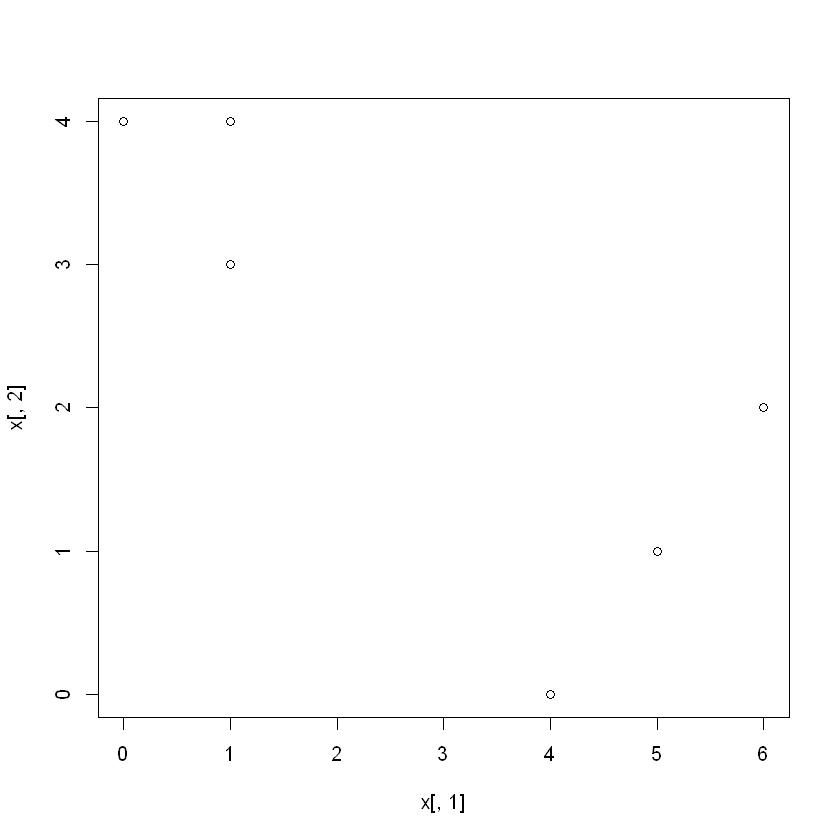

In [1]:
#Part a

x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(x[,1], x[,2])

In [3]:
#Part b

set.seed(1)
clusters <- sample(2, nrow(x), replace = T)
clusters

[1] 1 2 1 1 2 1

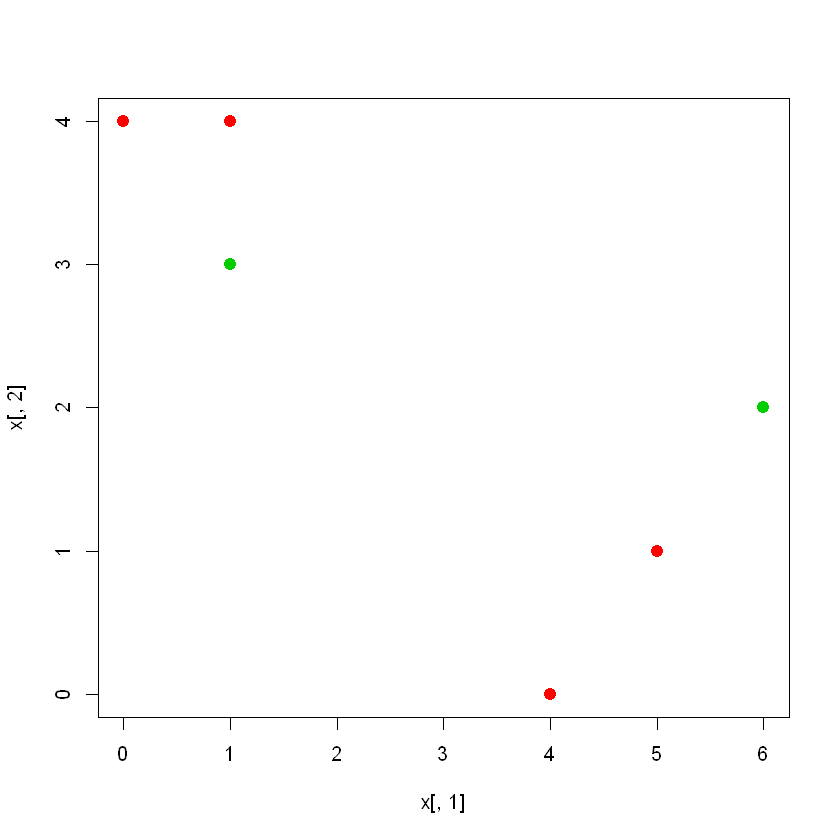

In [4]:
plot(x[, 1], x[, 2], col = (clusters + 1), pch = 20, cex = 2)

In [7]:
#Part c

In [8]:
#Part d

In [9]:
#Part e

In [10]:
#Part f 

### Exercise 4

In [11]:
#Part a
#There is not enough information to answer since with single linkage dendrogram and complete linkage dendrogram for the clusters
#mentioned, different results are obtained in different cases and cannot be compared.

In [12]:
#Part b
#They would fuse at the same time for single and complete linkage.

### Exercise 8

In [15]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [13]:
#Part a
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [14]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [16]:
#Part b
loadings <- pr.out$rotation
USArrests_2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests_2)^2, 2, sum))
apply((as.matrix(USArrests_2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

### Exercise 9

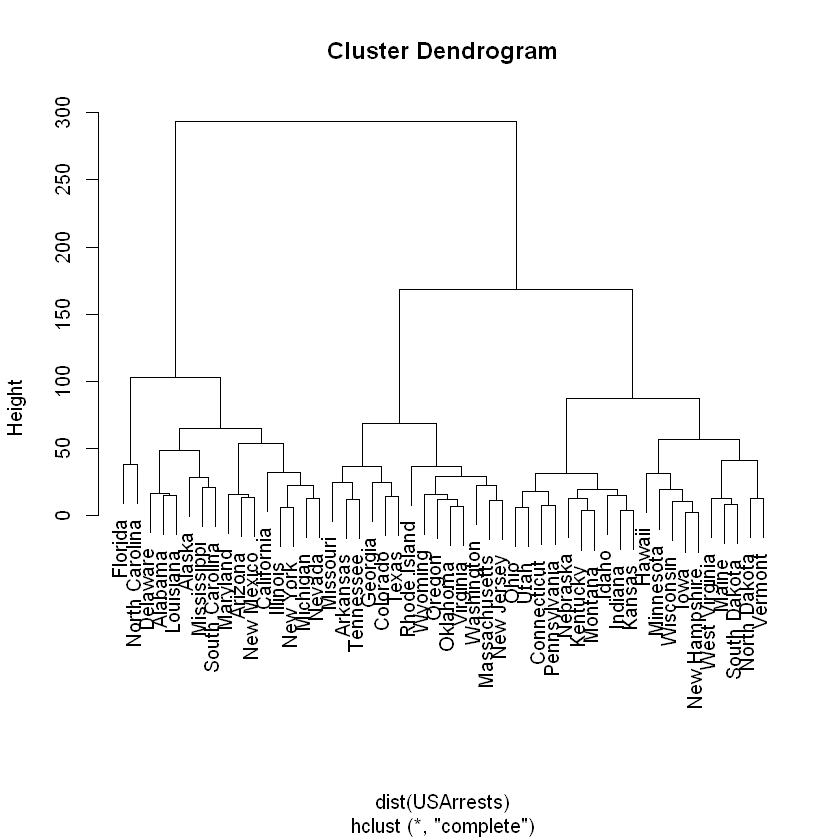

In [17]:
#Part a
set.seed(2)
hc_complete <- hclust(dist(USArrests), method = "complete")
plot(hc_complete)

In [18]:
#Part b
cutree(hc_complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

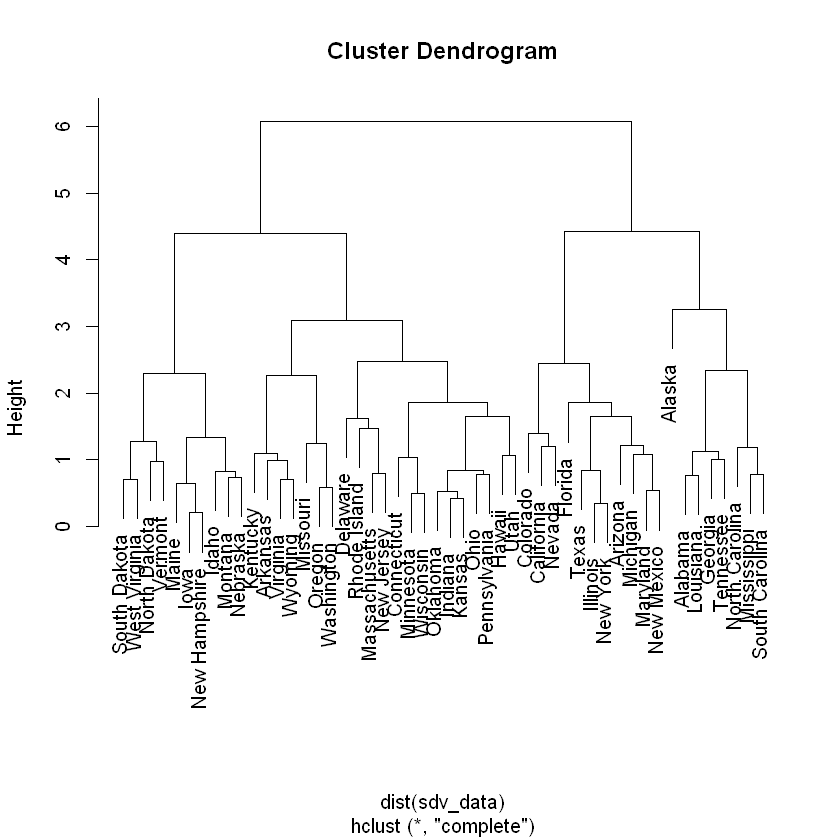

In [19]:
#Part c
sdv_data <- scale(USArrests)
hc_complete_sdv <- hclust(dist(sdv_data), method = "complete")
plot(hc_complete_sdv)

In [20]:
#Part d
cutree(hc_complete_sdv, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [21]:
table(cutree(hc_complete, 3), cutree(hc_complete_sdv, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

In [22]:
#Scaling the variables affects the clusters obtained.

### Exercise 10

In [23]:
#Part a
set.seed(2)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

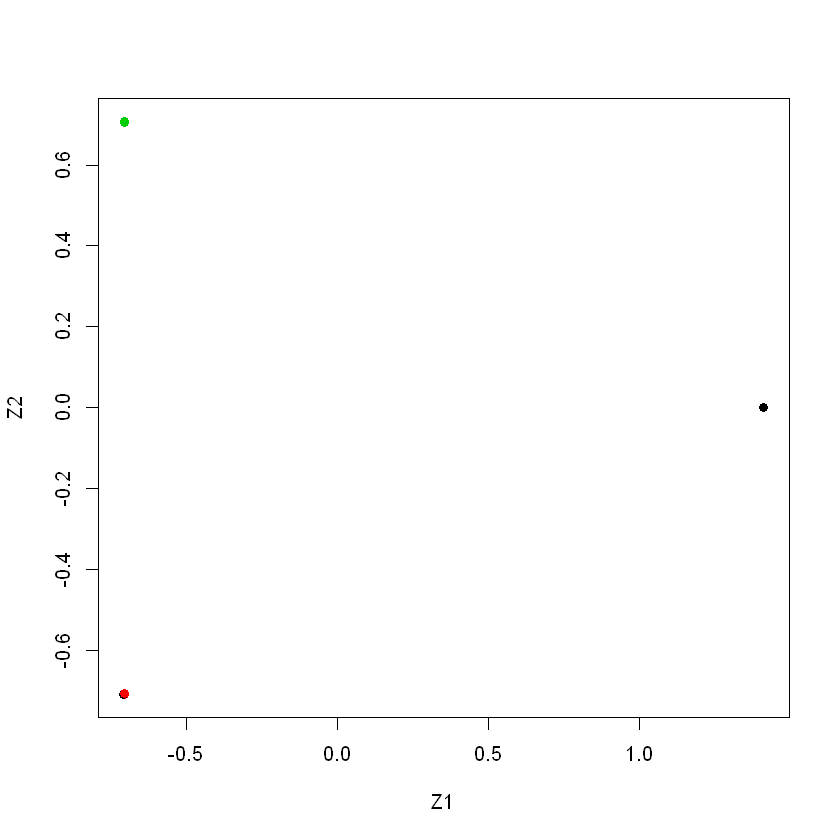

In [24]:
#Part b
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 19)

In [25]:
#Part c
k_cluster <- kmeans(x, 3, nstart = 20)
table(true.labels, k_cluster$cluster)
#The observations are clustered properly

           
true.labels  1  2  3
          1  0  0 20
          2 20  0  0
          3  0 20  0

In [26]:
#Part d 
k_cluster <- kmeans(x, 2, nstart = 20)
table(true.labels, k_cluster$cluster)
#All observations of one of the clusters is absorbed in one of the two other clusters.

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0

In [27]:
#Part e
k_cluster <- kmeans(x, 4, nstart = 20)
table(true.labels, k_cluster$cluster)
#The first cluster is divided into two

           
true.labels  1  2  3  4
          1 11  9  0  0
          2  0  0 20  0
          3  0  0  0 20

In [28]:
#Part f
k_cluster <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(true.labels, k_cluster$cluster)
#The observations are clustered properly

           
true.labels  1  2  3
          1  0  0 20
          2  0 20  0
          3 20  0  0

In [29]:
#Part g
k_cluster <- kmeans(scale(x), 3, nstart = 20)
table(true.labels, k_cluster$cluster)
#The results got worse with unscaled data

           
true.labels  1  2  3
          1  9  2  9
          2  2 18  0
          3  7  1 12